<a href="https://colab.research.google.com/github/riyapalesha/SPPU_LP3_Lab/blob/main/ML/ML_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Predict the price of the Uber ride from a given pickup point to the agreed drop-off location. Perform following tasks:

# Pre-process the dataset.
# Identify outliers.
# Check the correlation.
# Implement linear regression and random forest regression models.
# Evaluate the models and compare their respective scores like R2, RMSE, etc.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
data=pd.read_csv('./datasets/uber.csv')

In [ ]:
df=data.copy()
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [ ]:
df.shape

(200000, 9)

In [ ]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [ ]:
df.dtypes

Unnamed: 0                         int64
key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [ ]:
df["pickup_datetime"]=pd.to_datetime(df["pickup_datetime"])
df["pickup_datetime"].dtype

datetime64[ns, UTC]

In [ ]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

<AxesSubplot:>

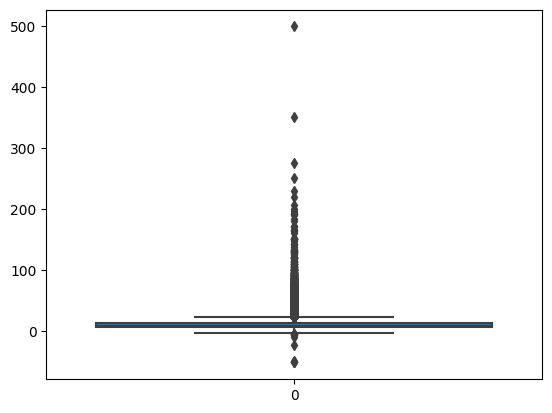

In [ ]:
sns.boxplot(df["fare_amount"])

In [ ]:
q1=df["fare_amount"].quantile(0.01)
q3=df["fare_amount"].quantile(0.99)
df=df[(df["fare_amount"]>q1) & (df["fare_amount"]<q3)]
df.shape

(188990, 9)

<AxesSubplot:>

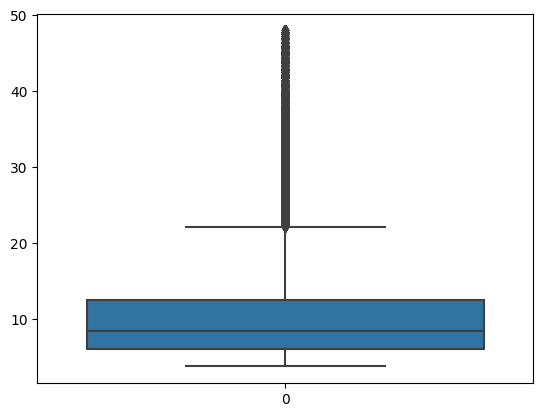

In [ ]:
sns.boxplot(df["fare_amount"])

C:\Temp\ipykernel_12872\2699745944.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<AxesSubplot:>

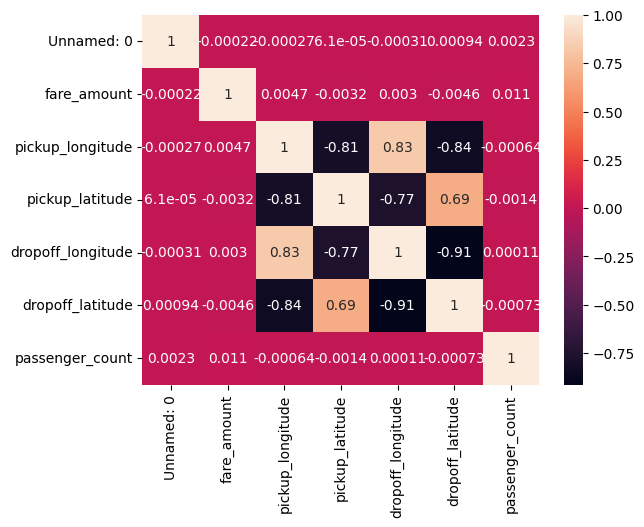

In [ ]:
corr=df.corr()
sns.heatmap(corr,annot=True)

In [ ]:
df.head(1)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1


In [ ]:
x=df.iloc[:,3:9]
x.head(1)

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1


In [ ]:
y=df["fare_amount"]
y.head()

0     7.5
1     7.7
2    12.9
3     5.3
4    16.0
Name: fare_amount, dtype: float64

In [ ]:
x["pickup_datetime"]=pd.to_numeric(x["pickup_datetime"])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
rmse=np.sqrt(mean_squared_error(y_test,lr_pred))
r2=r2_score(y_test,lr_pred)
print("RMSE = ",rmse)
print("R2 Score = ",r2)

RMSE =  7.032954732164155
R2 Score =  0.014087674059885869


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100,random_state=101)
rfr.fit(x_train,y_train)
rfr_pred=rfr.predict(x_test)

In [ ]:
rmse=np.sqrt(mean_squared_error(y_test,rfr_pred))
r2=r2_score(y_test,rfr_pred)
print("RMSE = ",rmse)
print("R2 Score = ",r2)

RMSE =  3.0181098254637595
R2 Score =  0.8184347506310135
